# Project: Investigate a Dataset - [The Movie Database]TMDB

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question">Question</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#ref">References</a></li>

</ul>

<a id='intro'></a>
## Introduction

>
The Movie Database (TMDB) contains several collections of movies and television shows includind the directors, cast, genre, release date, etc. Movies lovers can now choose which movie they like to watch. This report analyses a sample of the dataset from TMDB between 1960 and 2015.

>In my report, the dependent variables analyzed are genres and the vote average (Average rating).

>Voting Average: This is the standard rating system adopted by IMDB. The rating is from 1 (lowest) to 10 (highest). It usually serves as a measure of how much a movie is preferred by the populace and this metric is adopted by many users to select their movie of preference.

>Genre: Most users have a particular taste in Genre. Some may prefer a genre to another and some genres are also more widely accepted than others.

>Cast: The choice of users is greatly influenced by the casts in a movie. Fans of a particular movie cast prefer movies by the cast to other movies. Users may also rate the quality of a movie by the casts it features.

>Other important variables considered in this dataset includes;

>Revenue: The amount of revenue generated might be a relection of the quality of a movie/tv show. Good shows tend to generate higher revenue. Similarly, many individuals prefer the highest grossing movies because of the assumed quality it is expected to have.

>Budget: The Budget is the total amount on a movie/tv show from inception to production. Sometimes, high-budgeted movies may be perceived as quality because more money is spent on the movie to make it top-notch.
Based on the dependent and independent variables mentioned above, the following are the research questions analyzed in this report.

>Who are the most featured casts and what are the characteristics attributed to them?
Who are the casts of the highest grossing movies and what is the general overview of their footprint in the movie industry?
Does genre popularity influence rating?.

<a id='question'></a>

## Questions answered in this code are
### 1)Which are the movies with the third-lowest and third-highest budget?
### 2) What is the average number of words in movie titles between the year 2010-2015?
### 3) What is the most common Genre for Dwayne Johnson & Chris Hemsworth movies?
### 4) Which are the movies with most and least earned revenue?
### 5) What is the average runtime of movies in the year 2006?


#### Importing the necessary libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>

## Data Wrangling

#### In this part of my analysis, we'd consider the following:
> Data importing / Accessing the data

> Data cleaning

> Data structuring, string processing

> Handling dates and times

> Handling missing data, and text mining.

In [105]:
#Importing the data into a dataframe

df = pd.read_csv('tmdb_movies.csv')
df = pd.DataFrame(df)

df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Descriptive statistics summary

In [106]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Asseessing the data

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Columns Data types


In [108]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

## Check the missing data in each column

In [109]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Data Cleaning

In [110]:
#Completing the columns with empty cells, to clean up the data

df.insert(0, 'New_ID', range(0, len(df)))
columns = ["id", "homepage", "keywords", "overview", "production_companies", "tagline", "imdb_id", "director", "vote_count", "release_year"]
df.drop(labels=columns, axis = 1, inplace = True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   New_ID          10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10790 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_average    10866 non-null  float64
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1018.8+ KB
None


In [111]:
#Display the columns
print(df.columns)

Index(['New_ID', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'runtime', 'genres', 'release_date', 'vote_average', 'budget_adj',
       'revenue_adj'],
      dtype='object')


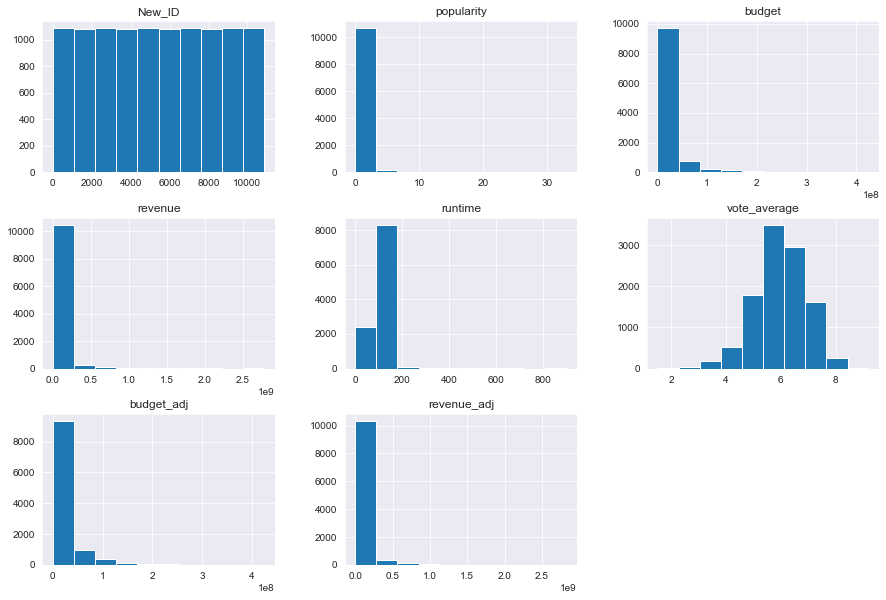

In [113]:
#A histogram showing the data in each column
df.hist(figsize= (15,10));

### Checking date and time for proper structuring

In [114]:
print("Dates before processing them\n", df['release_date'].head(5))
df['release_date'] = pd.to_datetime(df['release_date'])
print("Dates after processing them\n", df['release_date'].head(5))

Dates before processing them
 0      6/9/15
1     5/13/15
2     3/18/15
3    12/15/15
4      4/1/15
Name: release_date, dtype: object
Dates after processing them
 0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]


## Solving the questions
### 1). Which movie has the third lowest budget and the third highest budget.


> In this section, i sorted every movie, based on the budget, then i filtered them down to the third highest and lowest respectively.

> The reason for this is to know which movies spent more and less between 1960 and 2015.

In [115]:
def sort(column, n_num, keep_type_max, keep_type_min, keep_all):
    '''
        column = dataset['column']
        n_num, keep_type_max, keep_type_min,
        keep_all = nLargest or nSmallest parameters
    '''
    df_sort = df.copy()
    if(keep_all == "no"): 
        df_sort = df_sort.drop_duplicates(subset = column, keep="first")
    maximum = df_sort.loc[df_sort[column].nlargest(n_num, keep = keep_type_max).idxmin()]
    id_max = df_sort.loc[lambda df_sort: df_sort[column] == maximum[column]]
    
    minimum = df_sort.loc[df_sort[column].nsmallest(n_num, keep = keep_type_min).idxmax()]
    id_min = df_sort.loc[lambda df_sort: df_sort[column] == minimum[column]]
    return id_max['original_title'], id_min['original_title']

maximum, minimum = sort('budget', 3, "all", "all", "no")
print(str("The movie with the third highest budget in the dataset is :- \n" + str(maximum) + "\n\nThe movie with third lowest budget in dataset is :- \n" + str(minimum) + "\n\n#####################\n"))

The movie with the third highest budget in the dataset is :- 
7387    Pirates of the Caribbean: At World's End
Name: original_title, dtype: object

The movie with third lowest budget in dataset is :- 
8944    Death Wish 2
Name: original_title, dtype: object

#####################



## 2). What is the average number of words in movie titles between the year 2010-2015?

> Aim is to know the average of the length of movie titles between 2010 and 2015.

In [116]:
def average(start, end, column_use, column_want, text): 
    ''' steat, end = limits for average, column_use, column_want = dataset['column']
        text = the working variable for average is text or number
    '''    
    identity_for_year = df.loc[lambda df: ((df[column_use] > start) & (df[column_use] < end))]
    sum = 0
    for temp in identity_for_year[column_want]:
        if (text == "text"):
            pieces = len(temp.split())
            sum = sum + pieces
        if (text == "number"):
            sum = sum + temp
    average_count = sum/len(identity_for_year)
    return average_count

count = average(pd.datetime(2009,12,31), pd.datetime(2016,1,1), 'release_date', 'original_title', "text")         
print(str("Average Word length in movie titles in 2010 - 2015 is approx :- \n" + str(round(count, 1)) + " Words\n\n###############################\n"))

Average Word length in movie titles in 2010 - 2015 is approx :- 
2.8 Words

###############################



## 3). What is the most common Genre for Dwayne Johnson & Chris Hemsworth movies?

In [117]:
def tit_for_tat(data1, column2, data1_column):
    df_temp = df.copy()
    df_temp[data1_column] = df_temp[data1_column].str.contains(data1)
    df_temp.drop(df_temp[df_temp[data1_column] == False].index, inplace = True)
    df_temp.drop(["New_ID", "budget", "revenue", "original_title", "runtime", "release_date"], axis = 1, inplace = True)
    df_temp.insert(0, 'New_ID', range(0, len(df_temp)))
    
    set_genre = set()
    for temp_genre in df_temp[column2].str.split('|').values:
        if isinstance(temp_genre, float): continue
        set_genre = set_genre.union(temp_genre)
    
    #counting the number of genres
    genre_count = dict()
    for s in set_genre: genre_count[s] = 0
    for temp_genre in df_temp[column2].str.split('|'):        
        if type(temp_genre) == float and pd.isnull(temp_genre): continue        
        for s in [s for s in temp_genre if s in set_genre]: 
            if pd.notnull(s): genre_count[s] += 1
    genre_occurences = []
    for k,v in genre_count.items():
        genre_occurences.append([k,v])
    genre_occurences.sort(key = lambda x:x[1], reverse = True)
    return genre_occurences, genre_count

count, count1 = tit_for_tat("Dwayne Johnson", 'genres', 'cast')
print(str("The most common genre of movies performed by Dwayne Johnson is :- \n" + str(count[:1]) + "\n\n"))
count, count1 = tit_for_tat("Chris Hemsworth", 'genres', 'cast')
print(str("The most common genre of movies performed by Chris Hemsworth is :- \n" + str(count[:1]) + "\n\n###############################\n"))


The most common genre of movies performed by Dwayne Johnson is :- 
[['Documentary', 42]]


The most common genre of movies performed by Chris Hemsworth is :- 
[['Documentary', 43]]

###############################



## 4). Which are the movies with most and least earned revenue?

> Aim is to know which movies generated the most and least revenue between 1960 and 2015.

In [118]:
### Using the fumction "sort" from question 1
maximum, minimum = sort('revenue', 1, "all", "all", "yes")
print(str("The movie with the most revenue in the dataset is/are :- \n" + str(maximum) + "\n\nThe movie with the least revenue in dataset is/are :- \n" + str(minimum) + "\n\n###########\n"))


The movie with the most revenue in the dataset is/are :- 
1386    Avatar
Name: original_title, dtype: object

The movie with the least revenue in dataset is/are :- 
48                            Wild Card
67                             Survivor
74               Mythica: The Darkspore
75       Me and Earl and the Dying Girl
92             Mythica: The Necromancer
                      ...              
10861                The Endless Summer
10862                        Grand Prix
10863               Beregis Avtomobilya
10864            What's Up, Tiger Lily?
10865          Manos: The Hands of Fate
Name: original_title, Length: 6016, dtype: object

###########



## 5). What is the average runtime of movies in the year 2006

In [119]:
### Using the fumction "average" from question 2
count = average(pd.datetime(2005, 12, 31), pd.datetime(2007, 1, 1), 'release_date', 'runtime', "number")
print(str("Average runtime of movies in 2006 is approx :- \n" + str(round(count, 2)) + " Minutes\n"))

Average runtime of movies in 2006 is approx :- 
101.68 Minutes



In [120]:
#Defining the parameters of any dependent variable. e.g assuming any column to be a dependent variable.
def dependent_variable(x):
    df1 = df[df[x].notna()]
    df_v1 = df1[x].str.split("|",expand = True)
    df_v1.columns = ['split1','split2','split3','split4','split5']
    for c in df_v1.columns:
        df1[c] = df_v1[c]
    
    name = "corrected_" + x
    v1 = df1.drop(['split2', 'split3','split4','split5'],1)
    v1[name] = v1['split1']

    v2 = df1[df1['split2'].notna()]
    v2 = v2.drop(['split1', 'split3','split4','split5'],1)
    v2[name] = v2['split2']

    v3 = df1[df1['split3'].notna()]
    v3 = v3.drop(['split1', 'split2','split4','split5'],1)
    v3[name] = v3['split3']

    v4 = df1[df1['split4'].notna()]
    v4 = v4.drop(['split1', 'split2','split3','split5'],1)
    v4[name] = v4['split4']

    v5 = df1[df1['split5'].notna()]
    v5 = v5.drop(['split1', 'split2','split3','split4'],1)
    v5[name] = v5['split5'] 
    
    first_merge_cast = v1.merge(v2,how="outer")
    second_merge_cast = first_merge_cast.merge(v3, how="outer")
    third_merge_cast = second_merge_cast.merge(v4, how="outer")
    df1 = third_merge_cast.merge(v5,how="outer")

    df1 = df1.drop(['split1', 'split2','split3','split4','split5','cast'],1)
    return df1

In [48]:
#Considering the cast and genres to be a proffe
cast_df = dependent_variable('cast')
genres_df = dependent_variable("genres")

<a id='eda'></a>
## Exploratory Data Analysis

> This part shows the graphical representation of some and all the data neccessary for my analysis.



In [122]:
#Getting the top 5 movies by revenue.

top_5 = df[df['revenue'] >= 1513528810].sort_values(by="revenue",ascending=False)['original_title']
top_5.values

array(['Avatar', 'Star Wars: The Force Awakens', 'Titanic',
       'The Avengers', 'Jurassic World'], dtype=object)

### Research Question 1 (Who are the popular casts to have appeared the most, and what are the characteristics attributed to them?)

> The main logic behind this code is to visualize the casts that appeared the most in the dataset

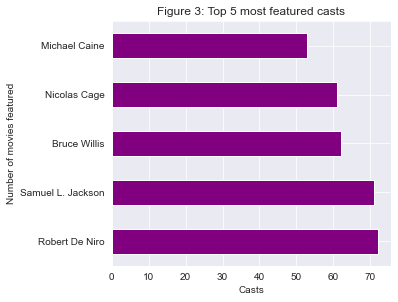

In [124]:
# from the dataset, count the casts(corrected_cast) column to know which name appears the most five times.
five_most_popular = cast_df['corrected_cast'].value_counts()[0:5]
fig = plt.figure(figsize =(5, 4.5))
five_most_popular.plot.barh(color='purple')
plt.title("Figure 3: Top 5 most featured casts")
plt.xlabel("Casts")
plt.ylabel("Number of movies featured")
plt.show()

#### From the trend above, we know the casts that has featured the most in movies, with the number of times that they appeared respectively. Between 1960 and 2015.\

In [63]:
#know the total revenue generated by each cast that featured the most in movies between 1960 and 2015
for i in five_most_popular.index:
    avg = cast_df[cast_df["corrected_cast"] == i]["revenue"].mean()
    print (i,round(avg))

Robert De Niro 71200080
Samuel L. Jackson 99406032
Bruce Willis 105905564
Nicolas Cage 79776868
Michael Caine 101075212


### Research Question 2: How does genre popularity affect the movie rating?

In [65]:
#A movie can have more than one genre
genres_list = genres_df['corrected_genres'].value_counts() 


### A visual representation of the most common genre in the dataset

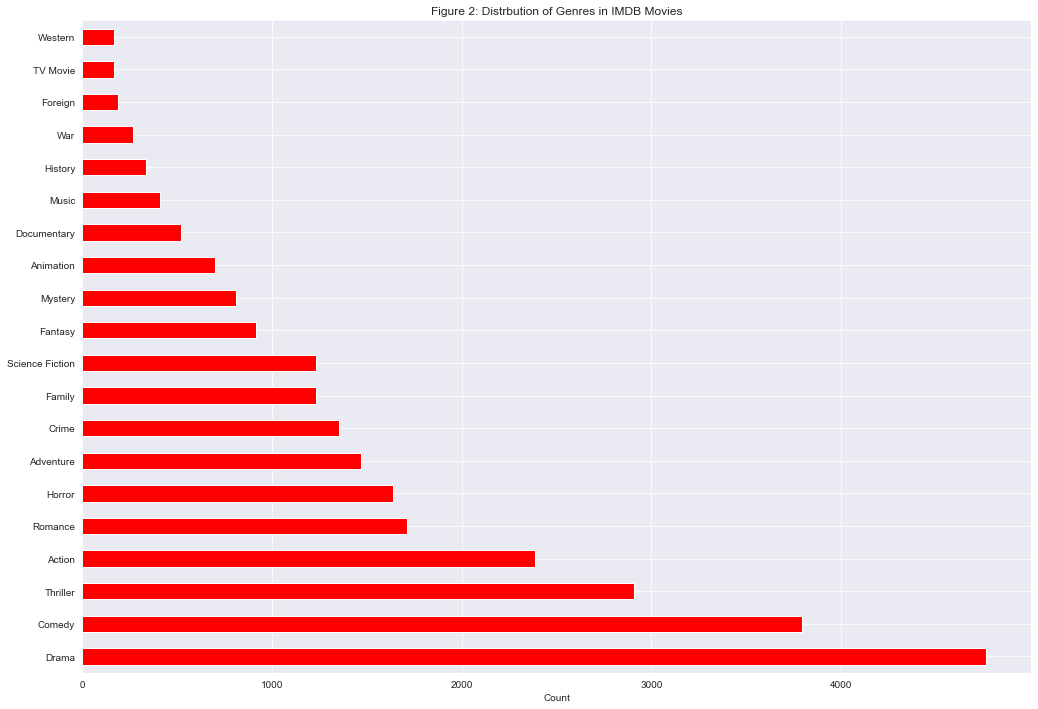

In [72]:
#plot a bar chart to show the most genre
fig = plt.figure(figsize =(17, 12))
genres_list.plot.barh(color='r')
plt.title("Figure 2: Distrbution of Genres in IMDB Movies")
plt.xlabel("Count")
plt.show()

In [74]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TMDB.ipynb'])

1

<a id='conclusions'></a>

### Conclusions

>In this project, I analyzed the International Movies dataset containing movies from 1960 to 2015.
>In this analysis, I observed the movies with the third highest and third lowest budgets respectively.
>We also looked at the average words used in a movie title in the year 2006.
>We specifically analyzed the common genre of movies that Dwayne Johnson and Chris Hemsworth appeared in the most.

>I calculated the movies with the most and least revenues generated respectively, with the movie "Avatar" being the highest grossing movie with a revenue of 2.7 billion dollars. It also had a movie rating of 7.1 which is above the average rating of movies(5).

>On the contrary, "Shattered glass" and "Mallrat" were the movies with the lowesr revenues generated.

>I also calculated the average runtime of movies in the year 2006.

>Robert De Niro is the most featured cast featuring in 72 movies as early as 1973. second to him is Samuel L. Jackson who featured in 71 movies from 1992 to 2015. However, none of the top 5 most featured casts were casts in the highest grossing movies.

>This report also established that certain genres were more favourable to users than the others. Although not the most featured genre in the movie industry, the Documentary, Music and History genres had a higher average rating than the other genres.

>From this analysis, we can deduce that there's a strong relationship between genre popularity and the revenue generated.

> The key performance index is also derived in this analysis to help in further machine learning.

>We also notice that genre popularity influences the rating of a movie.

<a id='limitations'></a>

### Limitations
> A major limitation of this report is that the movies in the database are not up to date. Therefore the analysis performed are limited to movies from 1960 to 2015. Also, the data had some mismatch which could affect the analysis reported. Some of which are:

> The movie Tekken (2010) directed by Dwight Little was recorded twice

> The casts of some movies were missing

> The genres of some movies were missing

<a id='ref'></a>

### References
<ul>
<li><a href='https//:pandas.pydata.com.com'>Pandas(Pydata)</a></li>
<li><a href='https//:stackoverflow.com'>Stackoverflow</a></li>
<li><a href='https//:kaggle.com'>Kaggle</a></li>

</ul>